In [23]:
import pandas as pd # library
import matplotlib.pyplot as plt # viz plots
import numpy as np # mean, medial, centrl tendancies
import seaborn as sns # viz plots more appealing

# opening the file
data = pd.read_csv("ames.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [24]:
# Data Summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [25]:
#Statistical Summary
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [26]:
#Interpretive Text
summary = data [['SalePrice', 'TotRmsAbvGrd', 'OverallCond']]
summary

,SalePrice,TotRmsAbvGrd,OverallCond
0,208500,8,5
1,181500,6,8
2,223500,6,5
3,140000,7,5
4,250000,9,5
...,...,...,...
1455,175000,7,5
1456,210000,7,6
1457,266500,9,9
1458,142125,5,6


c:\Users\Laptop\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Laptop\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


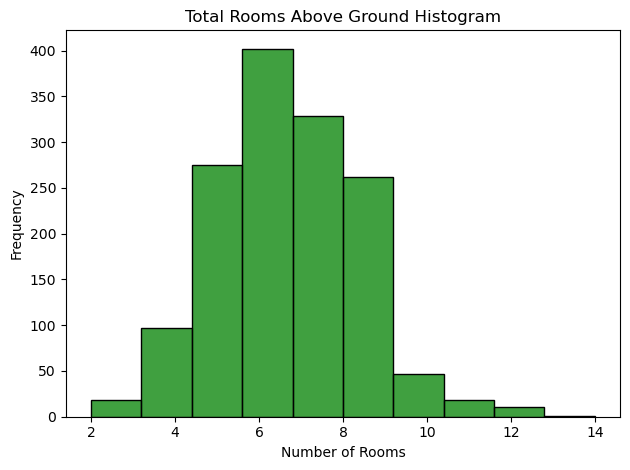

In [27]:
#Total Rooms Above Ground 
sns.histplot(data["TotRmsAbvGrd"], bins=10, color='green', edgecolor='black')
plt.title("Total Rooms Above Ground Histogram")
plt.xlabel("Number of Rooms")
plt.ylabel("Frequency")

plt.tight_layout() #best fit
plt.show()  #show output of plot

c:\Users\Laptop\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Laptop\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


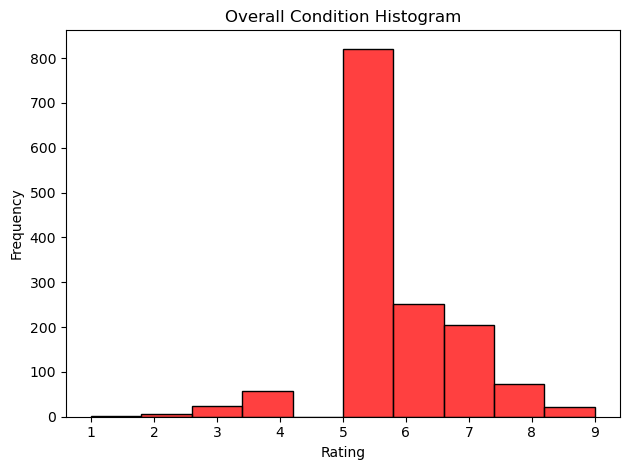

In [28]:
#Overall Condition column Visualization
sns.histplot(data["OverallCond"], bins=10, color='red', edgecolor='black')
plt.title("Overall Condition Histogram")
plt.xlabel("Rating")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

c:\Users\Laptop\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Laptop\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


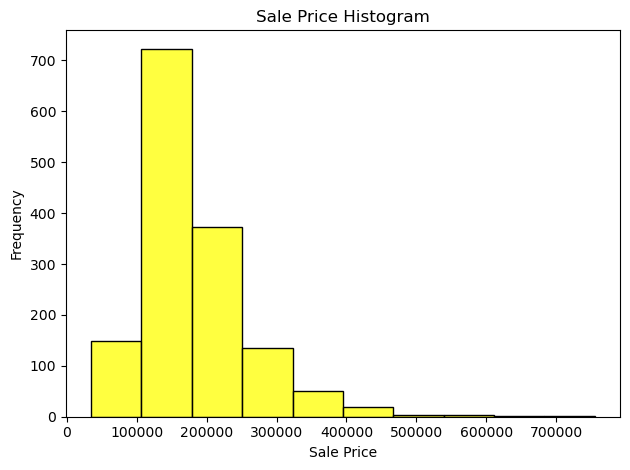

In [29]:
#Sales Price Column Viz
sns.histplot(data["SalePrice"], bins=10, color='yellow', edgecolor='black')
plt.title("Sale Price Histogram")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [30]:
#Summary statistics of SalePrice Column
mean = np.mean(data["SalePrice"])
median = np.median (data["SalePrice"])
std_deviation = np.std(data["SalePrice"])

print(f"Mean : {mean}")
print(f"Median : {median}")
print(f"Standard Deviation : {std_deviation}")

Mean : 180921.19589041095
Median : 163000.0
Standard Deviation : 79415.29188606751


In [31]:
#Summary Statistics of Total Rooms above ground Column
mean = np.mean(data["TotRmsAbvGrd"])
median = np.median(data["TotRmsAbvGrd"])
std_deviation = np.std(data["TotRmsAbvGrd"])
mode = np.array(data["TotRmsAbvGrd"])    ########

print(f"Mean : {mean}")
print(f"Median : {median}")
print(f"Mode : {mode}")
print(f"Standard Deviation : {std_deviation}")

Mean : 6.517808219178082
Median : 6.0
Mode : [8 6 6 ... 9 5 6]
Standard Deviation : 1.6248365536982048


In [32]:
#Summary Statistics of Overall Condition
mean = np.mean(data["OverallCond"])
median = np.median(data["OverallCond"])
std_deviation = np.std(data["OverallCond"])

print(f"Mean : {mean}")
print(f"Median : {median}")
print(f"Standard Deviation : {std_deviation}")

Mean : 5.575342465753424
Median : 5.0
Standard Deviation : 1.1124181757710145


In [33]:
# Subsetting based on OverallCond
subset = data[['OverallCond', 'SalePrice']]
subset

,OverallCond,SalePrice
0,5,208500
1,8,181500
2,5,223500
3,5,140000
4,5,250000
...,...,...
1455,5,175000
1456,6,210000
1457,9,266500
1458,6,142125


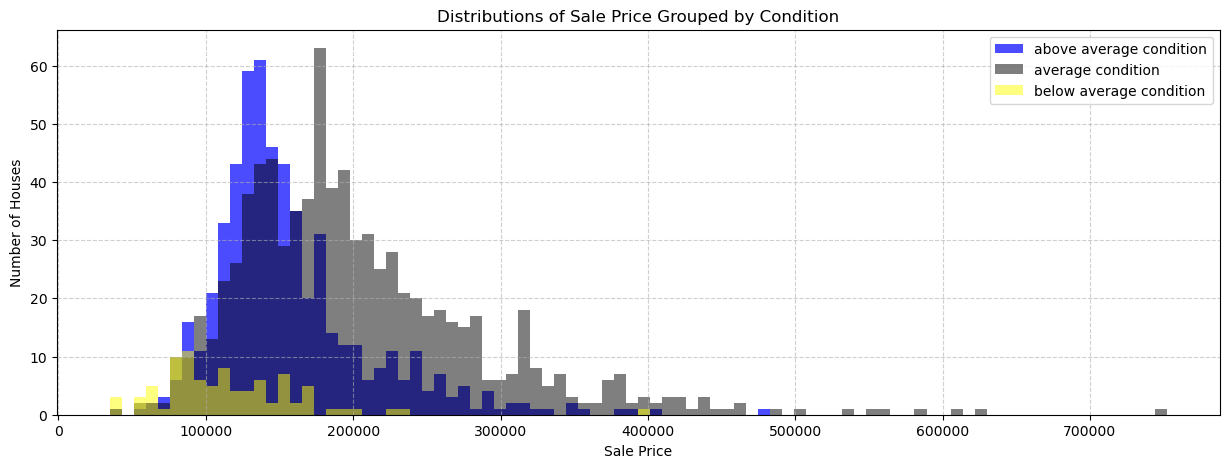

In [34]:
#Visual Distribution of the Subset against SalePrice
df = pd.DataFrame(data)

below_average_conditions = df[df['OverallCond'] < 5] 
average_conditions = df[df['OverallCond'] == 5]  
above_average_conditions = df[df['OverallCond'] > 5]  

fig, ax = plt.subplots(figsize=(15,5))

bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

ax.hist(
    x=above_average_conditions["SalePrice"],
    label="above average condition",
    bins=bins,
    color="blue",
    alpha=0.7
)
ax.hist(
    x=average_conditions["SalePrice"],
    label="average condition",
    bins=bins,
    color="black",
    alpha=0.5
)
ax.hist(
    x=below_average_conditions["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();
ax.grid(True, linestyle='--', alpha=0.6)

In [35]:
# +ve correlation
correlation = df['LotArea'].corr(df['SalePrice'])
correlation

0.26384335387140573

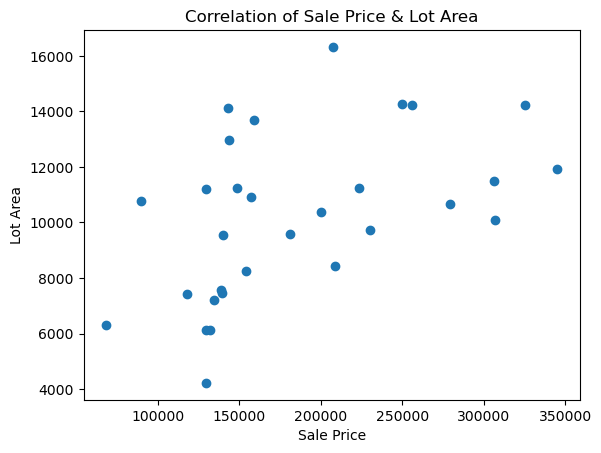

In [36]:
# Plotting the +ve correlation
lot_area = data['LotArea'].head(30)
sale_price = data['SalePrice'].head(30)
plt.scatter(sale_price, lot_area)
plt.title("Correlation of Sale Price & Lot Area")
plt.xlabel("Sale Price")
plt.ylabel("Lot Area")
plt.show()

In [37]:
# -ve correlation between enclosed porch and sales price
correlation = df['EnclosedPorch'].corr(df['SalePrice'])
correlation 

-0.1285779579259565

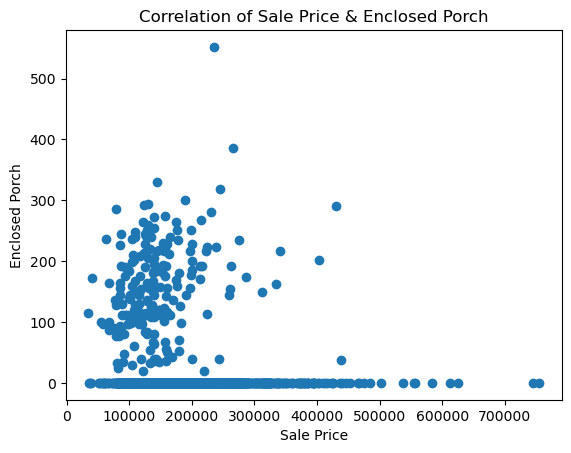

In [38]:
# Plotting the -ve correlation between sales price and enclosed porch
enclosed_porch = df['EnclosedPorch']
sale_price = df['SalePrice']
plt.scatter(sale_price, enclosed_porch)
plt.title("Correlation of Sale Price & Enclosed Porch")
plt.xlabel("Sale Price")
plt.ylabel("Enclosed Porch")
plt.show()

In [39]:
#Creating new feature (Age)
df = pd.DataFrame(data)

age = df["YrSold"] - df["YearBuilt"]
df["Age"] = age
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolQC  Fence MiscF

In [40]:
#Relationship between Age and SalePrice
correlation = df['Age'].corr(df['SalePrice'])
correlation

-0.523350417546816

c:\Users\Laptop\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Laptop\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


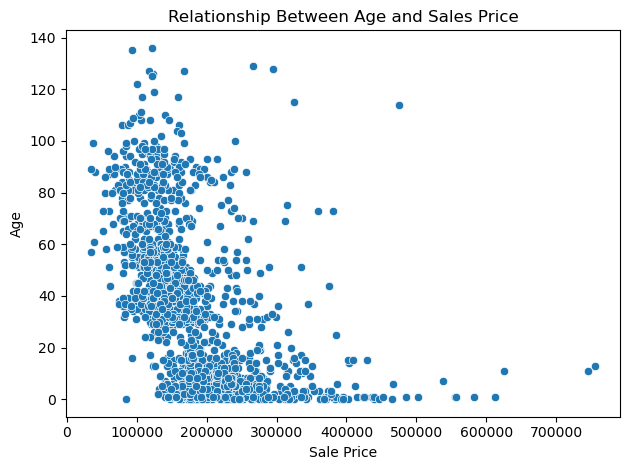

In [41]:
# Visual Relationship
sns.scatterplot(data=df, x='SalePrice', y='Age')

plt.xlabel('Sale Price')
plt.ylabel('Age')
plt.title('Relationship Between Age and Sales Price')
plt.tight_layout()
plt.show()

### General Analysis
-Newer houses had the highest sale price
-Few units above 100 years were sold at a cheaper price
-Some house with no Enclosed Porch tend to have higher saleprice than the ones with enclosed porch
-The bigger the lot area, the higher the SalePrice
-Most of the houses had a SalePrice range of 100,000 and 300,000
-Most of the above average condition houses ranged between 100,000 and 200,000
-Most of Below average condition houses Sold few units with a range of 80,000 to 180,000 
-Most of the houses sold were average condition and above
-Most Houses sold had 5-9 rooms above ground.